In [15]:
#Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the data
job_postings = pd.read_csv('../../../../data/job_postings.csv')
job_skills = pd.read_csv('../../../../data/job_skills.csv')

display("Job Postings Dataset:")
display(job_postings.describe())
display("Job Skills Dataset:")
display(job_skills.describe())

'Job Postings Dataset:'

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,12217,12217,12217,12217,12217,12217,12217,12217,12216,12217,12217,12217,12217,12217,12217
unique,12217,5763,1,1,1,1,6484,3947,2049,6,801,4,711,2,3
top,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-19 09:45:09.215838+00,Finished NER,t,t,f,Senior Data Engineer,Jobs for Humanity,"New York, NY",2024-01-13,Greater London,United States,Data Entry Clerk,Mid senior,Onsite
freq,1,6455,12217,12217,12217,12217,285,732,280,4946,189,10291,1088,10919,12188


'Job Skills Dataset:'

,job_link,job_skills
count,12217,12212
unique,12217,12204
top,https://www.linkedin.com/jobs/view/senior-mach...,"VolunteerMatch, LinkedIn for Good"
freq,1,3


1. Geographical Representation (US vs. All 4 Regions) - Is our data biased to the US? 
#The data clearly shows a heavy bias to the USA, which means any analysis will more applicable to this region. Canada, UK, Australia are underrepresented, so we should be careful when drawing conclusions for these geographies once we conduct a deeper analysis of this data set. The best path forward for unbiased analysis should be to drop non-US job postings from the data sets and narrow the focus of our analysis to the USA only accordingly.

'Job Counts by Location:'

,count
search_country,
United States,10291
United Kingdom,995
Canada,630
Australia,301


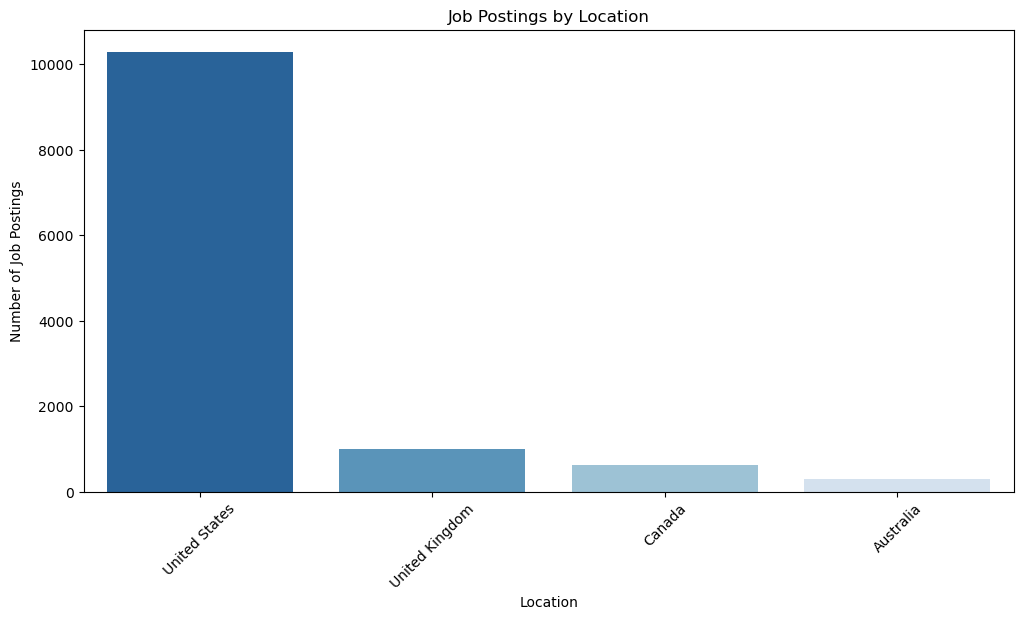

<Figure size 640x480 with 0 Axes>

In [17]:
job_counts = job_postings['search_country'].value_counts().head(10)
display("Job Counts by Location:")
display(pd.DataFrame(job_counts))

# Plot job postings by location
plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, hue=job_counts.index, palette="Blues_r", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.title("Job Postings by Location")
plt.show()

# save figure
plt.savefig('../../../../resources/eda_1.3_job_postings_by_location_bar.png')


2. Identifying Data Biases

#By graphing the distribution of the top 50 skills, we can see a variety of techical and non-technical mix. It is also possible to spot some duplicate values (e.g., Data Analysis vs. Data analysis), which will need to be cleaned up. Skill counts are heavily tilted to Python and SQL, which we believe is reasonable given the foundational nature of these techinical skills in the tech industry due to their versatility and open-source nature.

                                            job_link        job_skills
0  https://www.linkedin.com/jobs/view/senior-mach...  machine learning
0  https://www.linkedin.com/jobs/view/senior-mach...       programming
0  https://www.linkedin.com/jobs/view/senior-mach...            python
0  https://www.linkedin.com/jobs/view/senior-mach...             scala
0  https://www.linkedin.com/jobs/view/senior-mach...              java


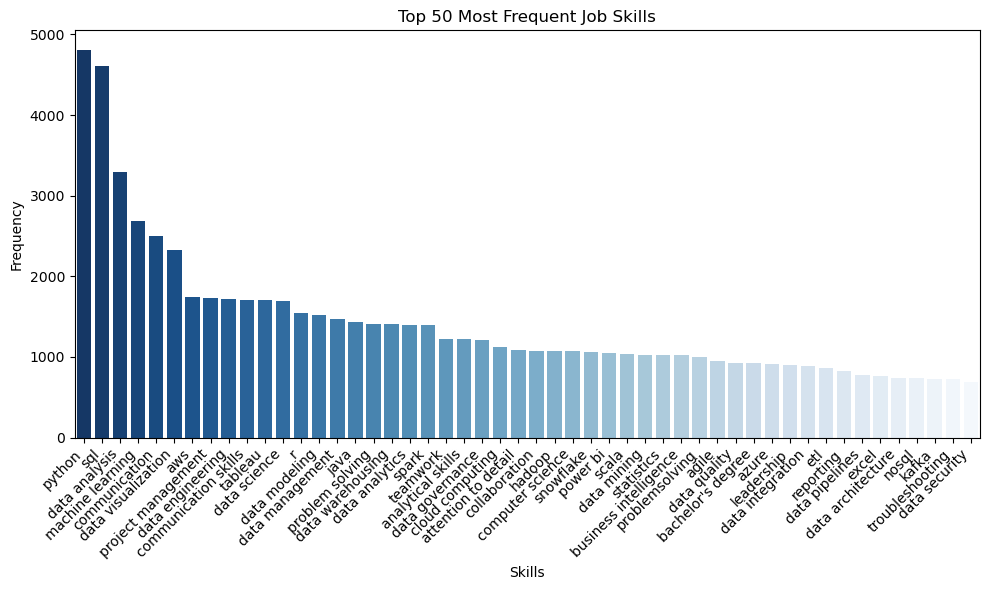

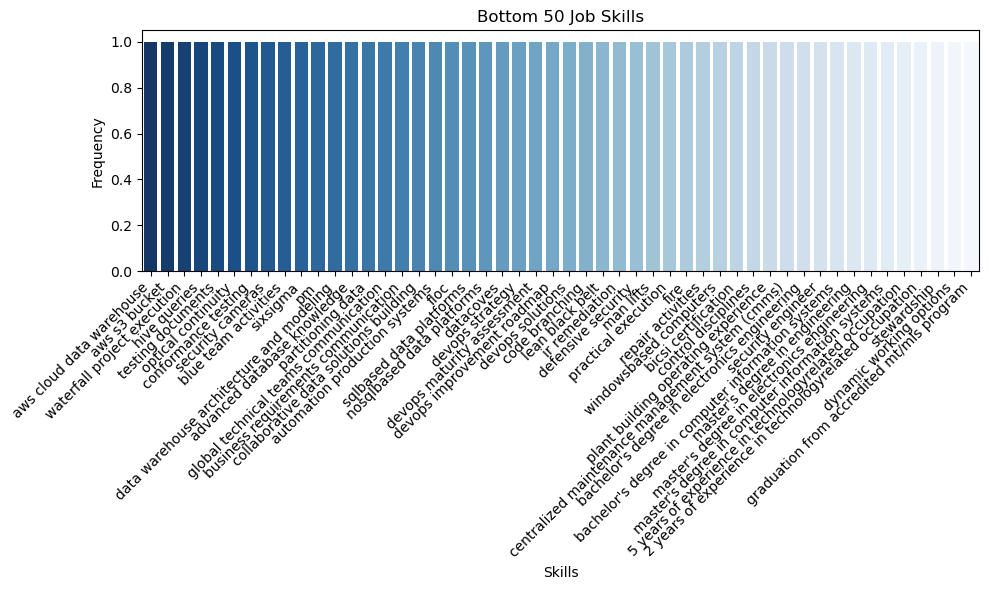

Number of unique skills: 64963


In [18]:
# Drop rows where 'job_skills' is NaN or empty
job_skills = job_skills.dropna(subset=["job_skills"])  # Drop NaNs
job_skills = job_skills[job_skills["job_skills"] != ""]  # Drop empty strings

# Convert 'job_skills' to string and split into lists
job_skills["job_skills"] = job_skills["job_skills"].astype(str)
job_skills["job_skills"] = job_skills["job_skills"].str.split(", ")  # Split into lists

# Explode into separate rows
job_skills = job_skills.explode("job_skills")

# Remove empty job_skills entries (in case any empty strings remain)
job_skills = job_skills[job_skills["job_skills"] != ""]

# Standardize skill names (convert to lowercase & strip spaces)
job_skills["job_skills"] = job_skills["job_skills"].str.lower().str.strip()

# Preview the cleaned data
print(job_skills.head())

# Count the occurrences of each skill
skill_counts = job_skills['job_skills'].value_counts()

# Plot the top 50 most frequent skills
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.head(50).index, y=skill_counts.head(50).values, hue=skill_counts.head(50).index, palette='Blues_r')

# Set plot labels and title
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Job Skills')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

# Show the plot
plt.tight_layout()
plt.show()

#Plot the bottom 50 least frequent skills
plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.tail(50).index, y=skill_counts.tail(50).values, hue=skill_counts.tail(50).index, palette='Blues_r')

# Set plot labels and title
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Bottom 50 Job Skills')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

# Show the plot
plt.tight_layout()
plt.show()

# Print the number of unique skills after cleaning
print("Number of unique skills:", job_skills['job_skills'].nunique())



